In [1]:
#!/usr/bin/python
import nltk
import numpy as np
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
from random import randint
from sklearn.model_selection import train_test_split
import random

Importing Glove and  40000 words list 

In [2]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))
print(wordVectors.shape)
print(wordsList[5066])
print(wordVectors[5066][:])

Loaded the word list!
Loaded the word vectors!
400000
(400000, 50)
closure
[ 0.50653   0.12284  -0.11653  -0.21052  -1.0672   -0.17536   0.16253
  0.76781   0.25517  -0.15995   0.025424 -0.65425  -0.44638  -0.19395
  0.45319   1.0955    0.050096 -0.36712   0.1729    0.28393   0.85448
 -0.54932  -1.1816    0.066158 -0.58561  -0.84893   0.1947    0.37832
  0.94141   0.62982   2.3869   -0.41035  -0.11599   0.049907 -0.41563
 -0.056999  1.5044   -0.93772  -0.16045   0.80019  -0.44448  -0.50036
  0.065875  0.27778  -0.27505  -0.012317 -0.37458   0.49171  -0.35498
  0.035347]


Importing the Dataset 

In [3]:
#--------------------Extracting Emotion && sentences from corpus
def extract(dataset):
    f = open(dataset, 'r+')
    linea = f.readline()
    emotion = []
    sentences = []
    neutro = re.compile('^ne')
    while linea != "":    
        #Ignoramos Neutro emotions
        if not re.match(neutro, linea):
            #print("** ",linea)
            linea = linea.split("#")
            #Obtaining the emocion
            emotion.append(int(linea[0]))
            sentences.append(linea[1])
        linea = f.readline()
    f.close()
    return sentences,emotion

dataset = "Heterogenious_Dataset/dataset.txt"
sentences,emotion = extract(dataset)
print(emotion[0]," ",sentences[0])
print("Labels: ",len(emotion), "Sentences: ",len(sentences))

2   Mortar assault leaves at least 18 dead

Labels:  3695 Sentences:  3695


In [4]:
print(emotion[0])

2


Cuánto hay de cada emoción

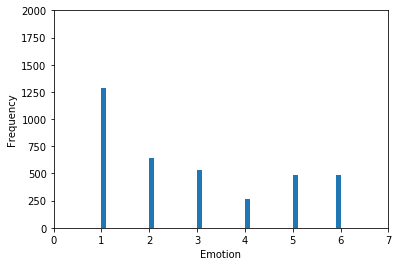

In [5]:
import matplotlib.pyplot as plt
import collections
%matplotlib inline
def histograma(emotion):
    #print(emotion)
    plt.hist(emotion, 50)
    plt.xlabel('Emotion')
    plt.ylabel('Frequency')
    plt.axis([0, 7, 0, 2000])
    plt.show()
histograma(emotion)

Preprocesing of Sentences

In [6]:
def decontracted(phrase):
    # specific
    '''phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)'''

    if phrase == "t":
        phrase = "not"
    elif phrase == "re":
        phrase = "are"
    elif phrase == "s":
        phrase = "is"
    elif phrase == "d":
        phrase = "would"
    elif phrase == "ve":
        phrase = "have"
    elif phrase == "m":
        phrase = "am"
    elif phrase == "ca":
        phrase = "can"
    elif phrase == "isn":
        phrase = "is"
    elif phrase == "aren":
        phrase = "are"
    elif phrase == "wouldn":
        phrase = "would"

    # general
    '''phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)'''
    return phrase

In [7]:
#----------------Cleanning Sentences--------------
def cleaner(sent):
    for s in range(0,len(sent)):
        print(sent[s])
        sent[s] = sent[s].lower()
        sent[s] = WordPunctTokenizer().tokenize(sent[s])#nltk.word_tokenize(sent[s])
        #print(sent[s])
        for word in range(0,len(sent[s])):
            sent[s][word] = decontracted(sent[s][word])
            sent[s][word] = re.sub(r'[^a-zA-Z0-9\s]', ' ', sent[s][word])
            sent[s][word] = sent[s][word].strip()
            
        sent[s] = list(filter(None, sent[s])) # fastest
        print(sent[s])
        print("-----------")
    return sent

c_sent = sentences[:]    
c_sent = cleaner(c_sent)
print(c_sent[0])

Mortar assault leaves at least 18 dead

['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
-----------
Goal delight for Sheva

['goal', 'delight', 'for', 'sheva']
-----------
Nigeria hostage feared dead is freed

['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
-----------
Bombers kill shoppers

['bombers', 'kill', 'shoppers']
-----------
Vegetables, not fruit, slow brain decline

['vegetables', 'not', 'fruit', 'slow', 'brain', 'decline']
-----------
PM: Havana deal a good experiment

['pm', 'havana', 'deal', 'a', 'good', 'experiment']
-----------
Kate is marrying Doherty

['kate', 'is', 'marrying', 'doherty']
-----------
NASA revisiting life on Mars question

['nasa', 'revisiting', 'life', 'on', 'mars', 'question']
-----------
Happy birthday, iPod

['happy', 'birthday', 'ipod']
-----------
Alonso would be happy to retire with three titles

['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']
-----------
Madonna's New Tot 'Happy at Home' in Lon

PS3 pricey but impressive

['ps3', 'pricey', 'but', 'impressive']
-----------
Pluto's revenge: 'Word of the Year' award

['pluto', 'is', 'revenge', 'word', 'of', 'the', 'year', 'award']
-----------
European Space Agency

['european', 'space', 'agency']
-----------
Hackers strike at key Internet servers

['hackers', 'strike', 'at', 'key', 'internet', 'servers']
-----------
Hussein co-defendants executed

['hussein', 'co', 'defendants', 'executed']
-----------
Memo from Frankfurt: Germany relives 1970s terror as 2 seek release from jail

['memo', 'from', 'frankfurt', 'germany', 'relives', '1970s', 'terror', 'as', '2', 'seek', 'release', 'from', 'jail']
-----------
Blissing out in Ojai

['blissing', 'out', 'in', 'ojai']
-----------
Houston, she's got some problems

['houston', 'she', 'is', 'got', 'some', 'problems']
-----------
Amazon.com has 'best ever' sales

['amazon', 'com', 'has', 'best', 'ever', 'sales']
-----------
Hackers attack root servers

['hackers', 'attack', 'root', 'servers


['taliban', 'seize', 'rural', 'district', 'in', 'southwest', 'as', 'police', 'flee']
-----------
Afghan poppy war alienates farmers

['afghan', 'poppy', 'war', 'alienates', 'farmers']
-----------
Will North Korea honor pledge this time?

['will', 'north', 'korea', 'honor', 'pledge', 'this', 'time']
-----------
Kim Jong-il bans Japanese cars in North Korea

['kim', 'jong', 'il', 'bans', 'japanese', 'cars', 'in', 'north', 'korea']
-----------
Iran vs. North Korea: not all enemies are equal

['iran', 'vs', 'north', 'korea', 'not', 'all', 'enemies', 'are', 'equal']
-----------
Catholic archbishop outlines Anglican merger hopes

['catholic', 'archbishop', 'outlines', 'anglican', 'merger', 'hopes']
-----------
Anglican and Catholic churches could merge

['anglican', 'and', 'catholic', 'churches', 'could', 'merge']
-----------
US helicopter crash kills 8 troops in Afghanistan

['us', 'helicopter', 'crash', 'kills', '8', 'troops', 'in', 'afghanistan']
-----------
Eight US soldiers killed in Z

['outdated', 'baby', 'food', 'found', 'on', 'shelves']
-----------
Tow truck drivers accused of stealing cars

['tow', 'truck', 'drivers', 'accused', 'of', 'stealing', 'cars']
-----------
Bush: It's time for Congress to back energy plan

['bush', 'it', 'is', 'time', 'for', 'congress', 'to', 'back', 'energy', 'plan']
-----------
UK soldiers cleared of Iraq abuse

['uk', 'soldiers', 'cleared', 'of', 'iraq', 'abuse']
-----------
FDA revises label warnings on the antibiotic Ketek

['fda', 'revises', 'label', 'warnings', 'on', 'the', 'antibiotic', 'ketek']
-----------
Toshiba Portege R400

['toshiba', 'portege', 'r400']
-----------
South Africa mourns Adelaide Tambo

['south', 'africa', 'mourns', 'adelaide', 'tambo']
-----------
Evacuees can return home after plant blast

['evacuees', 'can', 'return', 'home', 'after', 'plant', 'blast']
-----------
Anna Nicole Smith's body lies in legal limbo

['anna', 'nicole', 'smith', 'is', 'body', 'lies', 'in', 'legal', 'limbo']
-----------
Former teache

['you', 'can', 'handle', 'high', 'school', 'drama', 'also', 'i', 'have', 'so', 'many', 'friends', 'and', 'all', 'of', 'them', 'are', 'true', 'caring', 'trustworthy', 'friends', 'who', 'love', 'me', 'and', 'are', 'supporting', 'me', '100']
-----------
I can come through this year triumphantly and with grace.

['i', 'can', 'come', 'through', 'this', 'year', 'triumphantly', 'and', 'with', 'grace']
-----------
This is my year to be happy.

['this', 'is', 'my', 'year', 'to', 'be', 'happy']
-----------
This is my year to try new things and to succeed!

['this', 'is', 'my', 'year', 'to', 'try', 'new', 'things', 'and', 'to', 'succeed']
-----------
This is my first year of loving myself.

['this', 'is', 'my', 'first', 'year', 'of', 'loving', 'myself']
-----------
I look forward to learning and discovering even more of who I am, and loving every inch of it.

['i', 'look', 'forward', 'to', 'learning', 'and', 'discovering', 'even', 'more', 'of', 'who', 'i', 'am', 'and', 'loving', 'every', 'inch', 

-----------
I must say this summer has gone by in the blink of an eye.

['i', 'must', 'say', 'this', 'summer', 'has', 'gone', 'by', 'in', 'the', 'blink', 'of', 'an', 'eye']
-----------
just once I would love to not have to worry about that sort of thing.

['just', 'once', 'i', 'would', 'love', 'to', 'not', 'have', 'to', 'worry', 'about', 'that', 'sort', 'of', 'thing']
-----------
Should be interesting.

['should', 'be', 'interesting']
-----------
I was beginning to worry I'de have to put it off for yet another term.

['i', 'was', 'beginning', 'to', 'worry', 'i', 'de', 'have', 'to', 'put', 'it', 'off', 'for', 'yet', 'another', 'term']
-----------
hey I'll be a rich individual.

['hey', 'i', 'll', 'be', 'a', 'rich', 'individual']
-----------
whoot.

['whoot']
-----------
I'm really in it just for the money ;).

['i', 'am', 'really', 'in', 'it', 'just', 'for', 'the', 'money']
-----------
Worry gains you no more minutes to  your life.

['worry', 'gains', 'you', 'no', 'more', 'minutes', 'to

-----------
It's pretty disgusting.

['it', 'is', 'pretty', 'disgusting']
-----------
i freakin hate when you get in a bad mood and its not just one thing.

['i', 'freakin', 'hate', 'when', 'you', 'get', 'in', 'a', 'bad', 'mood', 'and', 'its', 'not', 'just', 'one', 'thing']
-----------
its just kinda just a bunch of little things and then you get sad and you just want to go cry and just be away from reality.

['its', 'just', 'kinda', 'just', 'a', 'bunch', 'of', 'little', 'things', 'and', 'then', 'you', 'get', 'sad', 'and', 'you', 'just', 'want', 'to', 'go', 'cry', 'and', 'just', 'be', 'away', 'from', 'reality']
-----------
and im not trying to be mean but if i say i dislike someone and you are like "why why why" and i try to explain but you're just like "thats stupid you shouldn't dislike her" it pisses me off if i have to defend myself for disliking someone.

['and', 'im', 'not', 'trying', 'to', 'be', 'mean', 'but', 'if', 'i', 'say', 'i', 'dislike', 'someone', 'and', 'you', 'are', 'li

['alack', 'said', 'the', 'tailor', 'i', 'have', 'my', 'twist', 'but', 'no', 'more', 'strength', 'nor', 'time', 'than', 'will', 'serve', 'to', 'make', 'me', 'one', 'single', 'buttonhole', 'for', 'this', 'is', 'christmas', 'day', 'in', 'the', 'morning']
-----------
Little Benjamin did not very much want to see his Aunt.

['little', 'benjamin', 'did', 'not', 'very', 'much', 'want', 'to', 'see', 'his', 'aunt']
-----------
Peter did not seem to be enjoying himself; he kept hearing noises.

['peter', 'did', 'not', 'seem', 'to', 'be', 'enjoying', 'himself', 'he', 'kept', 'hearing', 'noises']
-----------
Benjamin, on the contrary, was perfectly at home, and ate a lettuce leaf.

['benjamin', 'on', 'the', 'contrary', 'was', 'perfectly', 'at', 'home', 'and', 'ate', 'a', 'lettuce', 'leaf']
-----------
Peter did not eat anything; he said he should like to go home.

['peter', 'did', 'not', 'eat', 'anything', 'he', 'said', 'he', 'should', 'like', 'to', 'go', 'home']
-----------
Peter heard noises wor


['there', 'was', 'once', 'a', 'cook', 'named', 'gretel', 'who', 'wore', 'shoes', 'with', 'red', 'heels', 'and', 'when', 'she', 'walked', 'out', 'with', 'them', 'on', 'she', 'turned', 'herself', 'this', 'way', 'and', 'that', 'was', 'quite', 'happy', 'and', 'thought', 'you', 'certainly', 'are', 'a', 'pretty', 'girl']
-----------
And when she came home she drank, in her gladness of heart, a draught of wine, and as wine excites a desire to eat, she tasted the best of whatever she was cooking until she was satisfied, and said: "The cook must know what the food is like."

['and', 'when', 'she', 'came', 'home', 'she', 'drank', 'in', 'her', 'gladness', 'of', 'heart', 'a', 'draught', 'of', 'wine', 'and', 'as', 'wine', 'excites', 'a', 'desire', 'to', 'eat', 'she', 'tasted', 'the', 'best', 'of', 'whatever', 'she', 'was', 'cooking', 'until', 'she', 'was', 'satisfied', 'and', 'said', 'the', 'cook', 'must', 'know', 'what', 'the', 'food', 'is', 'like']
-----------
Then Gretel called out to her maste

['she', 'carried', 'him', 'down', 'and', 'then', 'with', 'loud', 'screams', 'she', 'hastened', 'to', 'the', 'boy', 'is', 'father', 'your', 'boy', 'cried', 'she', 'has', 'been', 'the', 'cause', 'of', 'a', 'great', 'misfortune']
-----------
He has thrown my husband down the steps so that he broke his leg.

['he', 'has', 'thrown', 'my', 'husband', 'down', 'the', 'steps', 'so', 'that', 'he', 'broke', 'his', 'leg']
-----------
Take the good-for-nothing fellow out of our house."

['take', 'the', 'good', 'for', 'nothing', 'fellow', 'out', 'of', 'our', 'house']
-----------
"What wicked tricks are these?" said he.

['what', 'wicked', 'tricks', 'are', 'these', 'said', 'he']
-----------
Go out of my sight.

['go', 'out', 'of', 'my', 'sight']
-----------
I will see you no more."

['i', 'will', 'see', 'you', 'no', 'more']
-----------
If you are cold, come and take a seat by the fire and warm yourselves."

['if', 'you', 'are', 'cold', 'come', 'and', 'take', 'a', 'seat', 'by', 'the', 'fire', 'and', '

['then', 'it', 'seemed', 'as', 'if', 'new', 'life', 'was', 'thrilling', 'through', 'every', 'fibre', 'of', 'root', 'and', 'stem', 'and', 'leaf', 'rising', 'even', 'to', 'the', 'highest', 'branches']
-----------
As he grew higher and still higher, with increased strength, his topmost boughs became broader and fuller; and in proportion to his growth, so was his self-satisfaction increased, and with it arose a joyous longing to grow higher and higher, to reach even to the warm, bright sun itself.

['as', 'he', 'grew', 'higher', 'and', 'still', 'higher', 'with', 'increased', 'strength', 'his', 'topmost', 'boughs', 'became', 'broader', 'and', 'fuller', 'and', 'in', 'proportion', 'to', 'his', 'growth', 'so', 'was', 'his', 'self', 'satisfaction', 'increased', 'and', 'with', 'it', 'arose', 'a', 'joyous', 'longing', 'to', 'grow', 'higher', 'and', 'higher', 'to', 'reach', 'even', 'to', 'the', 'warm', 'bright', 'sun', 'itself']
-----------
The grand, majestic oak could not be quite happy in the m

Les't determine the total and average number of words in each sentencesLes't determine the total and average number of words in each sentences

In [8]:
def maximum(sent):
    numWords = []
    for s in sent:
        counter = len(s)
        numWords.append(counter) 
    maxLengh = int(sum(numWords)/len(numWords))
    print("Average: ", maxLengh)
    return numWords,maxLengh
numWords,maxSeqLength = maximum(c_sent)

Average:  15


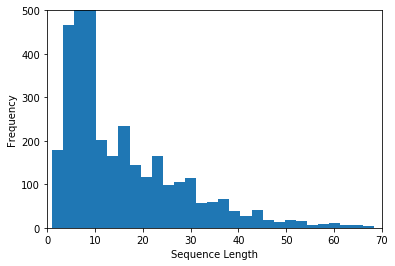

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def histograma(numWords):
    plt.hist(numWords, 50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.axis([0, 70, 0, 500])
    plt.show()
histograma(numWords)

Converting each sentence into a vector and adding it into a matrix of 'ids'

In [10]:
def integerSenteces(sent,maximum):
    i = 0
    embbeding = 0
    matrix = np.zeros((len(sent), maximum)) #250 X 6 (numEjem X Maximun)
    for s in sent:
        vector = np.zeros((maximum), dtype='int32')
        bound = maximum
        if len(s) < maximum:
            bound = len(s)    

        for token in range(0,bound): #No encuentra macu, porque la corta
            if s[token] not in wordsList:
                vector[token] = embbeding # ???
                #print(s[token])
            else:
                vector[token] = (wordsList.index(s[token]))
                embbeding = vector[token]
        matrix[i] = (vector)
        i += 1
    return matrix

In [11]:
X = integerSenteces(c_sent,maxSeqLength) 
print("Sentences integer representation: ",(X.shape))
print("Sentences: ",len(c_sent))
print("Integer format",X[249])
print("Normal format",c_sent[249])

Sentences integer representation:  (3695, 15)
Sentences:  3695
Integer format [  38.   32.   81. 1525. 3747.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.]
Normal format ['who', 'are', 'you', 'calling', 'fat']


Split the Data (stratify) into : Train && Test Sets

In [12]:
print("Sentences: ",len(X),"  Labels: ",len(emotion))
X_train, X_test, Y_train, Y_test = train_test_split(X, emotion, test_size=0.20, random_state=random.randrange(50), stratify=emotion)
print("X_train: ",len(X_train),"  Y_train: ",len(Y_train),"  X_test: ",len(X_test),"  Y_test: ",len(Y_test))

Sentences:  3695   Labels:  3695
X_train:  2956   Y_train:  2956   X_test:  739   Y_test:  739


Converting the Labels into Onehot Vectors

In [13]:
def toLabels(emo):
    classes = 6
    Y = np.zeros((len(emo), classes)) #Num Ejemplos X 6 emociones
    for e in range(0,len(emo)):
        vector = np.zeros((classes))
        vector[(emo[e] % (classes + 1)) - 1] = 1 
        Y[e] = vector
        #print(emo[e],"---",vector)
    return Y
 
Y_train = toLabels(Y_train)
Y_test = toLabels(Y_test)

In [14]:
print("Y_train: ",Y_train.shape," Num Ejem X # clases")
print("X_train: ",X_train.shape," Num Ejem X Maximun Lengh")
print("Y_test: ",Y_test.shape," Num Ejem X # clases")
print("X_test: ",X_test.shape," Num Ejem X Maximun Lengh")

Y_train:  (2956, 6)  Num Ejem X # clases
X_train:  (2956, 15)  Num Ejem X Maximun Lengh
Y_test:  (739, 6)  Num Ejem X # clases
X_test:  (739, 15)  Num Ejem X Maximun Lengh


RNN Model

In [15]:
batchSize = 50 #Tiene que ser multiplo del NumEjem
lstmUnits = 64
numClasses = 6

Declarando placeholders para los labels (6 emotions) && data imput

In [16]:
import tensorflow as tf
tf.reset_default_graph()
numDimensions = 300 

#labels = tf.placeholder(tf.float32, [batchSize, numClasses])
#input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])
labels = tf.placeholder(tf.float32, [None, numClasses])
input_data = tf.placeholder(tf.int32, [None, maxSeqLength])

Embeddings: Le damos el formato a nuestra data, aún no compilamos nada, solo declaramos

In [17]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

LSTM Model

In [27]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [28]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [29]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [30]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

C:\Users\danie\Anaconda3\envs\Compositor\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Tensorboar

In [34]:
import datetime
def board(sess):
    tf.summary.scalar('Loss', loss)
    tf.summary.scalar('Accuracy', accuracy)
    tf.summary.histogram("Histogrma/hAccu", accuracy)
    merged = tf.summary.merge_all()
    logdir = "board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
    writer = tf.summary.FileWriter(logdir, sess.graph)
    return merged,writer

Confusion Matrix Plot

In [33]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [51]:
# Initializing the variables
init = tf.global_variables_initializer()
display_step = 10
numEjemplos = 6817         
iterations = 100

X_train:  6817   Y_train:  6817   X_test:  1019   Y_test:  1019
Epoch: 0001 cost= 1.798554864  accuracy= 23.629469490
Epoch: 0011 cost= 1.405795729  accuracy= 40.850634522
Epoch: 0021 cost= 1.138388635  accuracy= 54.047866516
Epoch: 0031 cost= 0.818610192  accuracy= 68.118800858
Epoch: 0041 cost= 0.537570710  accuracy= 80.205882122
Epoch: 0051 cost= 0.379106401  accuracy= 86.407727310
Epoch: 0061 cost= 0.296402169  accuracy= 89.690887884
Epoch: 0071 cost= 0.186872606  accuracy= 93.793829180
Epoch: 0081 cost= 0.137665755  accuracy= 95.453575604
Epoch: 0091 cost= 0.117096732  accuracy= 96.187427771
Optimization Finished!
Accuracy: 0.29735035
             precision    recall  f1-score   support

   Hapinnes       0.57      0.50      0.53       167
    Sadness       0.28      0.27      0.27       161
      Anger       0.23      0.25      0.24       169
     Disust       0.22      0.24      0.23       160
   Surprise       0.25      0.17      0.20       180
       Fear       0.23      0.29 

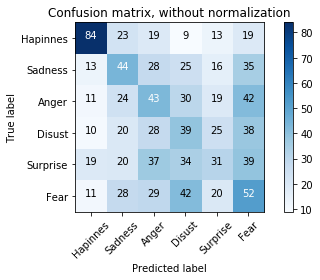

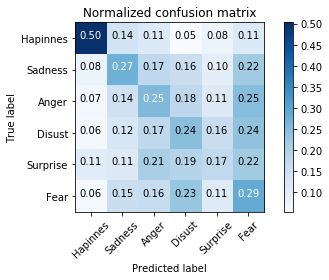

In [53]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Calling tensorboard function
    #---merged,writer = board(sess)
    print("X_train: ",len(X_train_b),"  Y_train: ",len(Y_train_b),"  X_test: ",len(X_test_b),"  Y_test: ",len(Y_test_b))

    # Training cycle
    for epoch in range(iterations):
        avg_cost = 0.
        avg_accu = 0.
        total_batch = int(numEjemplos/batchSize)
        #Create X groups of (50,6) Labels && (50,maximum) Examples
        X_batches = np.array_split(X_train_b, total_batch)
        Y_batches = np.array_split(Y_train_b, total_batch)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            #print("X: ",batch_x.shape)
            #print("Y: ",batch_y.shape)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c , accu= sess.run([optimizer, loss, accuracy], feed_dict={input_data: batch_x,
                                                          labels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            avg_accu += accu / total_batch

            #Write summary to Tensorboard
            '''if (epoch % 10 == 0):
                summary = sess.run(merged, {input_data: batch_x, labels: batch_y})
                writer.add_summary(summary, epoch)'''
            

            #Save the network every 10,000 training iterations
            #if (i % 10000 == 0 and i != 0):
                # save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
                 # print("saved to %s" % save_path)
            #writer.close()

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)," accuracy=", "{:.9f}".format(avg_accu*100))
    print("Optimization Finished!")
    
    #Test Model LSTM  
    correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correctPred, "float"))
    print("Accuracy:", accuracy.eval({input_data: X_test_b, labels: Y_test_b}))
    
    #Matriz de confusion

    #print("Test Samples, Class Predictions: ")
    #----Result es mi tensor prediction convertido a np.array
    result = tf.argmax(prediction , 1).eval({input_data: X_test_b, labels: Y_test_b})
    #print(result.shape)
    
    
    #print("Test Samples: ")
    test = (tf.argmax(Y_test_b , 1).eval()) #Convierte de [0,0,1,0,0] a [2] y lo hace np.array
    #print(test.shape)
    #print("Conversion: ")
    #for i in range(0,len(test)):
        #print(test[i],"---",Y_test[i],"---",result[i])
      

    from sklearn.metrics import confusion_matrix
    y_true = test
    y_pred = result
    #print(confusion_matrix(y_true, y_pred))
    class_names = ["Hapinnes","Sadness","Anger","Disust","Surprise","Fear"]

    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()


In [46]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  
print('Balance',Counter(emotion))

Balance Counter({1: 1284, 2: 640, 3: 528, 6: 488, 5: 486, 4: 269})


In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
#Banlancea ADASYN
X_balance, Y_balance = ADASYN().fit_sample(X,emotion)
print('Balance',Counter(Y_balance))

Balance Counter({6: 1402, 5: 1384, 3: 1297, 1: 1284, 2: 1242, 4: 1227})


In [48]:
print(X_balance.shape," ",Y_balance.shape)
print(len(X)," ",len(emotion))

(7836, 15)   (7836,)
3695   3695


In [49]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_balance, Y_balance, test_size=0.13, random_state=random.randrange(50), stratify=Y_balance)
print("X_train: ",len(X_train_b),"  Y_train: ",len(Y_train_b),"  X_test: ",len(X_test_b),"  Y_test: ",len(Y_test_b))

X_train:  6817   Y_train:  6817   X_test:  1019   Y_test:  1019


In [50]:
Y_train_b = toLabels(Y_train_b)
Y_test_b = toLabels(Y_test_b)

Otro Modelo: Solo balanceamos Trainset

In [ ]:
#Averogua ottros modelos
#Cambie el keep_drop
#Cambia learning rate
#Cambie num unidades 128?
#Prueba con tu modelo